   # Tesla Model S Inducion Motor Design
  

## Contents

***1.Introduction*** <br \>
***2.Design***<br \>
***2.1.Main dimensions of stator core *** <br \>
***2.2.The stator winding *** <br \>
***2.3.Stator slot sizing  ***<br \>
***2.4.Rotor slots ***<br \>
***2.5.The magnetization current ***<br \>
***2.6.Resistances and inductances*** <br \> 
***2.7.Losses and efficiency *** <br \>
***2.7.1.Weight ***<br \>
***2.8.Temperature rise *** <br \>
***3.Simulations ***<br \>
***3.1.Geometry ***<br \>
***3.2.Windings property***<br \>
***3.3.Iron core property *** <br \>
***3.4.Mesh editor ***<br \>
***3.5.Simulation results ***<br \>
***4.Different designs ***<br \>
***4.1.Changing stator slot widths ***<br \>
***4.2.Changing rotor current density ***<br \>
***5.Conclusion ***<br \>
***6.References***<br \>

## 1.Introduction

In this project, an induction motor will be designed. This motor is used in Tesla s model cars which has a few different variations. For an example, the RWD 85 Model Tesla car will be used for the design. Here are the induction motor specifications for RWD 85 :

✓ Maximum Power: 360 hp (270 kW)

✓ Maximum Torque: 441 Nm

✓ Top Speed: 225 km/h

For more detailed specifications can be found in [Tesla Model S](http://teslatap.com/undocumented/) and [Tesla Model S Motor](https://forums.teslamotors.com/it_IT/forum/forums/tesla-model-s-motor-output).

Here are some photos of Tesla Model S cars [1]: 

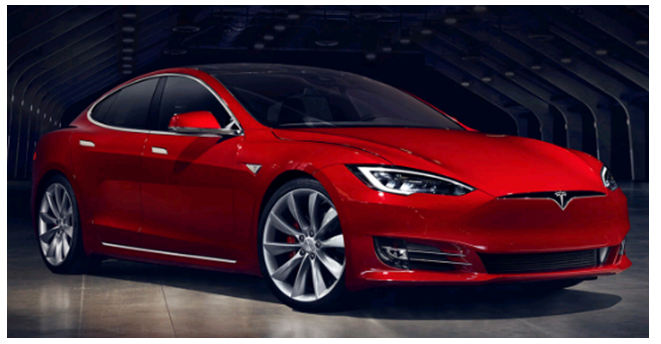

In [1]:
from IPython.display import Image
Image(filename='tesla1.png', width=600, height=500)

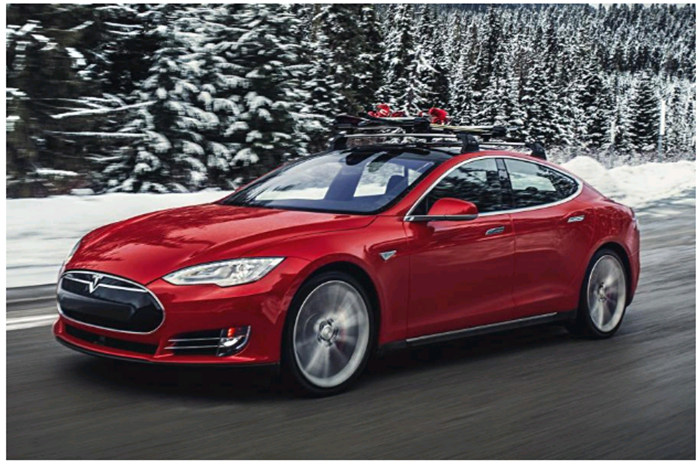

In [2]:
from IPython.display import Image
Image(filename='tesla2.png', width=600, height=500)

Here is a summarized table for all Model S cars [2]:

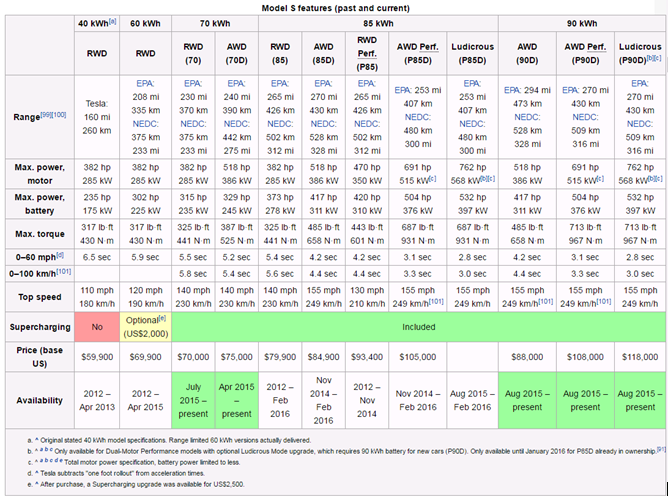

In [3]:
from IPython.display import Image
Image(filename='tesla3.png', width=600, height=500)

Here is the Tesla model S cars sales/registrations table by countries [2]:

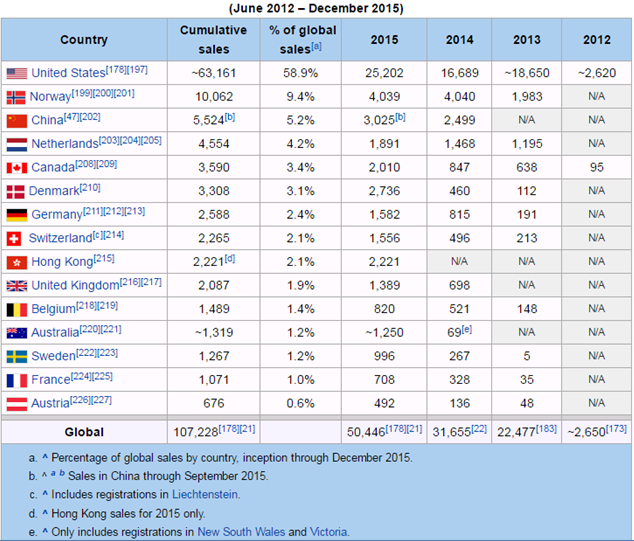

In [4]:
from IPython.display import Image
Image(filename='tesla4.png', width=600, height=500)

Here is an image of Tesla Model S car motor [3]: 

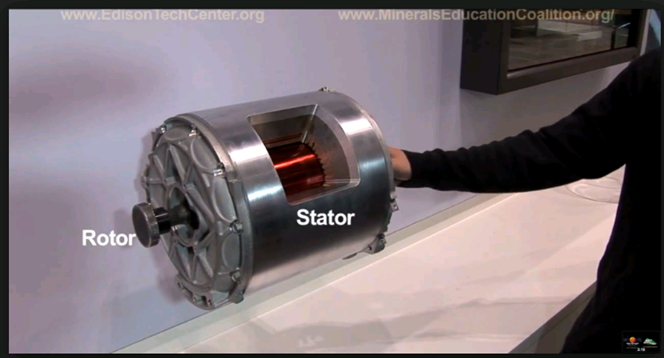

In [5]:
from IPython.display import Image
Image(filename='tesla5.png', width=600, height=500)

## 2.Design

For the design procedures of induction motor, ''I. Boldea and S.A. Nasar, "The Induction Machine Handbook", CRC Press LLC, 2002' has been used as reference guide.

From [4], the battery voltage of the car is composed of 96 cells series which have 4.2 Volts. The total battery voltage can be considered as 400 Volts approximately.

In [6]:
import math
Pr= 270000   #Rated power
Vbat=400     #Battery voltage
Vbat_ll=400*math.sqrt(2)  #Maximum line to line voltage
Vbat_ll_rms=Vbat/math.sqrt(2) #Maksimum rms line voltage
Vbat_ln=Vbat_ll_rms/math.sqrt(3) #Line to neutral voltage
print('Vln=',round(Vbat_ln),'Volts')

Vln= 163 Volts


The machine is three phase machine and number of pole-pairs is selected as 2

In [7]:
m=3     #Number of phase
pp=2     #Number of pole-pairs
p=4   #Number of poles

Target efficiency can be thought as 0.96 and the power factor is 0.84

In [8]:
eff=0.96  #Efficiency
pf= 0.84 #Power factor

Maximum speed of Tesla RWD 85 is 230 km/h, the maximum power of the motor is 285 kW and the maximum torque is 441 Nm [2].
Tesla Model S wheel radius are 21 inches and 19 inches [5]. I choose 19 inches one. The gear ratio is 9.73 [2].

In [9]:
Pmax=285000  #Maximum motor power
Tmax= 441  #Maximum torque
gr=9.73 #Gear ratio 
Speed_max_kmh= 230 #Maximum speed in km/h
Speed_max_ms= (Speed_max_kmh*1000)/3600 #Maximum speed in m/s
Rtire= 48.26 #Tesla Model S tire radius in cm
Speed_max_rpm=(Speed_max_ms*2*math.pi*(Rtire/100)*gr*60)/(2*math.pi) #Maximum speed in rpm
print('Maximum speed is=',round(Speed_max_rpm),'rpm')

Maximum speed is= 18000 rpm


For an induction motor frequency and speed relation as follows:
$n=\frac{120*f}{p}\qquad$

In [10]:
freq_max=(Speed_max_rpm*p)/120  #Frequency at 230 km/h speed (max speed)

If we assume that the average speed of the car is 82 km/h, we have to recalculate the average frequency.

In [11]:
freq=(freq_max*82)/230 #Frequency at the average speed of 82 km/h
print('Average frequency=',round(freq),'Hz')

Average frequency= 214 Hz


In [12]:
I_line=Pmax/(Vbat_ll_rms*math.sqrt(3)*pf*eff) #Maximum line current
print('Line current=',round(I_line,2),'A')

Line current= 721.42 A


### 2.1.Main Dimensions of Stator Core

The stator bore diameter can be calculated as, 
$D_{is} = \sqrt[3]{\frac{2p}{\pi\lambda}\frac{pp}{f_1}\frac{S_{gap}}{C_0}}\qquad$    
where, 
     $S_{gap}=\frac{K_EP_n}{\eta_ncos\phi_{1n}}\qquad$

and              $K_E=0.98-0.005pp\qquad$


In [13]:
KE=0.98-0.005*pp 
print('KE=',KE)
Sgap=(KE*Pmax)/(eff*pf)  #apparent airgap power in VA
print('Sgap=',round(Sgap,2),'VA')

KE= 0.97
Sgap= 342819.94 VA


In the equation above $\lambda$ represent stack aspect ratio. Stack aspect ratio can be determined with the following table:

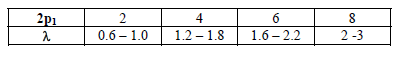

In [14]:
from IPython.display import Image
Image(filename='table1.png', width=600, height=500)

Also, in the equation $C_0$ represent Esson's constant. Esson's constant can be determined with the following curve:

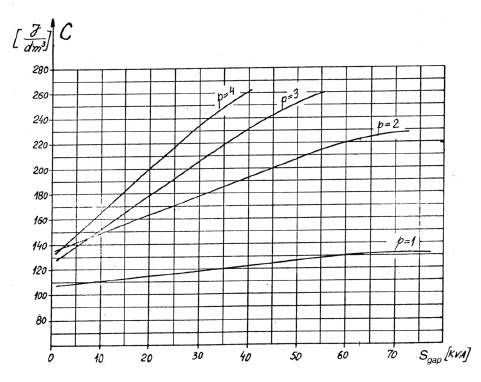

In [15]:
from IPython.display import Image
Image(filename='Esson.png', width=600, height=500)

We can set the stack aspect ratio as 1.5 and Esson's coefficient as 240000 because at 342 kVA apparent airgap power Esson's coefficient curve for 2 pole-pair will reach approximately 240000.

In [16]:
lambda_=1.5 #stack aspect ratio
C0=240000 #Esson's coefficient
Dis=math.pow((2.0*pp*pp*Sgap)/(math.pi*lambda_*freq*C0),1.0/3.0)  #stator bore diameter in m
print('Stator bore diameter is',round(Dis,4),'m')

Stator bore diameter is 0.2246 m


Stack lenght and pole pitch can be calculated from this equation

$\lambda=L(\frac{2pp}{\pi{D_{is}}})=\frac{L}{\tau}\qquad$

In [17]:
L=(lambda_*math.pi*Dis)/(2*pp)  #stack lenght in m
print('Stack lenght is',round(L,4),'m')
tau=(math.pi*Dis)/(2*pp)  #pole pitch in m
print('Pole pitch is',round(tau,4),'m')

Stack lenght is 0.2646 m
Pole pitch is 0.1764 m


The number of stator slots per pole 3q may be 3⋅2 = 6 or 3⋅3 = 9. For q = 3,
the slot pitch $\tau_s$ will be around  $\tau_s=\frac{\tau}{3q}\qquad$

In [18]:
q=4 #number of slots per phase
taus=tau/(m*q) # Slot pitch in m
print('Slot pitch is',round(taus,4),'m')

Slot pitch is 0.0147 m


Inner/outer stator diameter ratio, $K_D$, can be chosen from the following table;

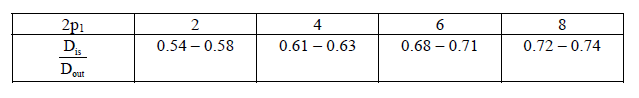

In [19]:
from IPython.display import Image
Image(filename='table2.png', width=600, height=500)

From the table for 2 pole-pair motor inner/outer stator diameter ratio cane be chosen as 0.62

In [20]:
KD=0.62 #inner/outer stator diameter ratio
Dout=Dis/KD   #stator outer diameter in m
print('Stator outer diameter is',round(Dout,4),'m')

Stator outer diameter is 0.3623 m


The airgap value can be calculated from $g=(0.1+0.012\sqrt[3]{P_{max}}10^-3\qquad$

In [21]:
g=(0.1+0.012*math.pow(Pmax,1.0/3.0))*1e-3   #airgap length in m
print('Airgap length is',round(g*10**3,4),'mm')

Airgap length is 0.8897 mm


### 2.2.The Stator Winding

In [22]:
Ns=2*pp*q*m  #Number of stator slots
print ('Stator is',Ns,'slots')

Stator is 48 slots


Two-layer winding with chorded coils: y/$\tau$=5/6 is chosen as 5/6=0.833 is close to 0.8 which would reduce the 5th and 7th harmonics.

The electrical angle between emfs in neighboring slots $\alpha_{ec}$ is $\alpha_{ec}=\frac{2\pi{pp}}{N_s}\qquad$

In [23]:
alpha_ec=(2*math.pi*pp)/(Ns) #electrical angle between emfs
print('Electrical angele between emfs is',round(alpha_ec,2),'rads')

Electrical angele between emfs is 0.26 rads


The star of emf phasors has 48/2=24 arrows and the distribution of phases in slots will be shown in the motor analysis program.

Distribution factor can be as: 
$K_{q1}=\frac{sin\frac{\pi}{6}}{qsin\frac{\pi}{6q}}\qquad$

In [24]:
Kq1=(math.sin(math.pi/6))/(q*math.sin(math.pi/(6*q)))  #Distribution factor
print ('Distribution factor is',round(Kq1,2))

Distribution factor is 0.96


Chording factor can be calculates as, $K_{y1}=sin\frac{\pi}{2}\frac{y}{\tau}\qquad$

In [25]:
Ky1=math.sin((math.pi*5)/(2*6))
print('Chording factor is',round(Ky1,2))

Chording factor is 0.97


And the stator winding factor becomes $K_{w1}=K_{q1}K_{y1}\qquad$

In [26]:
Kw1=Kq1*Ky1 #stator winding factor
print('Stator winding factor is',round(Kw1,2))

Stator winding factor is 0.93


The recommended values for the flux densities are in the intervals:

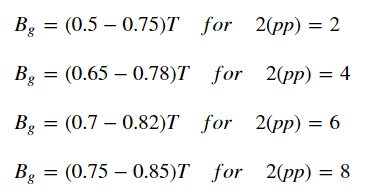

In [1]:
from IPython.display import Image
Image(filename='flux-density-values.png', width=400, height=400)

For 2 pole-pairs we can choose flux density as 0.65 Tesla.

In [27]:
Bg=0.65 #airgap flux density in tesla

The pole spanning coefficienct depends on tooth saturation factor. If we consider saturation factor as 1.4 with the pole spanning coefficient as 0.729 we can determine the value of the form factor from the following figure, 

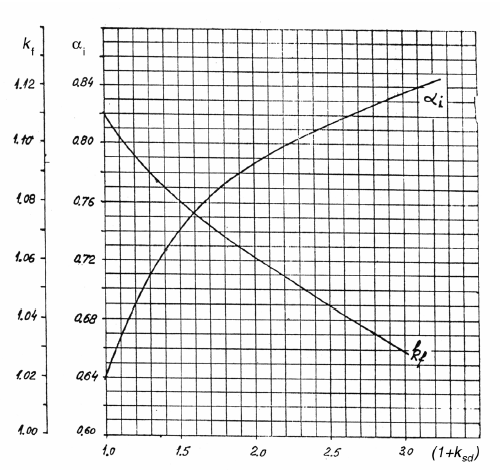

In [28]:
from IPython.display import Image
Image(filename='formfactor.png', width=400, height=400)

In [29]:
Kf=1.085 #Form factor
alpha_i=0.729 #pole spanning coefficient

The number of turns per phase is based on the pole flux $\phi$, <br />
$\phi=\alpha_i\tau{L}B_g\qquad$ <br /><br />
The number of turns can be calculated as, <br />
$W_1=\frac{K_EV_{1ph}}{4K_fK_{w1}f_1\phi}\qquad$

In [30]:
phi=alpha_i*tau*L*Bg  #pole flux
print('Pole flux is',round(phi,3),'Wb')
W1_f=(KE*Vbat_ln)/(4*Kf*Kw1*freq*phi) #number of turns per phase

Pole flux is 0.022 Wb


The number of conductors per slot can be calculated as, <br />
$n_s=\frac{a_1W_1}{ppq}\qquad$  where $a_1$ is the number of current paths in parallel

In [31]:
a1=2 #number of current paths in parallel
ns=(a1*W1_f)/(pp*q)
print('Number of current paths in parallel is',round(ns,2))

Number of current paths in parallel is 2.08


The number of conductors per slot should be an even number as there are two distinct coils per slot in a double layer so we can set the ns value as 2

In [32]:
ns=2 #new number of current paths in parallel
W1=(ns*pp*q)/(a1) #new number of turns per phase
print('Number of turns per phase is',round(W1,3))

Number of turns per phase is 8.0


Now we should recalculate the actual airgap flux density,

In [33]:
Bg=(0.7*W1_f)/(W1)
print('Airgap flux density is',round(Bg,2),'T')

Airgap flux density is 0.73 T


The rated current is, <br />
$I_{in}=\frac{P_n}{\eta_ncos\phi_n\sqrt3{V_1}}\qquad$

In [34]:
Iin=(Pmax)/(eff*pf*math.sqrt(3)*Vbat_ll_rms)
print('Rated current is',round(Iin,2),'A')

Rated current is 721.42 A


As high efficiency is required and, in general, at this power level and speed, winding losses are predominant from the recommended current densities : <br />
For 1 and 2 pole-pairs the current density should be in the range of 4-7 A/mm^2 <br />
For 3 and 4 pole-pairs the current density should be in the range of 5-8 A/mm^2 <br />
Our machine is 2 pole-pair then we can choose the current density value as 5 A/mm^2.


In [35]:
Jcos=5.5  #current density

The magnetic wire cross section can be calculated as, <br />
$A_{Co}=\frac{I_{1n}}{J_{cos}a_1}\qquad$

In [36]:
ACo=(Iin)/(Jcos*a1) #magnetic wire cross section in mm^2
print('The magnetic cross section is',round(ACo,2),'mm^2')

The magnetic cross section is 65.58 mm^2


In [37]:
dCo=math.sqrt(4*ACo/math.pi)  #wire gauge diameter in mm
print ('Wire gauge diameter is',round(dCo,2),'mm')

Wire gauge diameter is 9.14 mm


Now, we may use a few condurtors in parallel.

In [38]:
ap=10
dCo=math.sqrt((4*ACo)/(math.pi*ap))
print('dCo=',round(dCo,2),'mm')

dCo= 2.89 mm


From the following table we can choose AWG#6

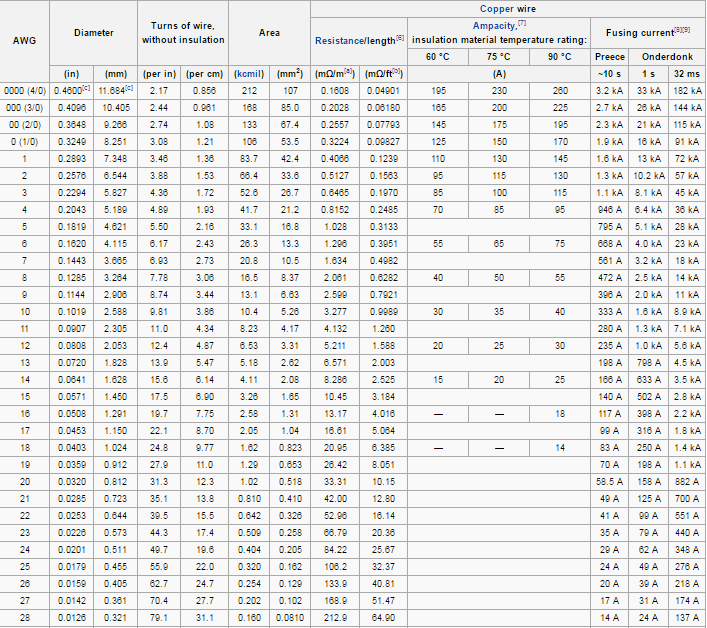

In [39]:
from IPython.display import Image
Image(filename='awgtable.png', width=600, height=600)

### 2.3.Stator Slot Sizing

We can calculate the useful slot area by using, <br />
$A_{su}=\frac{\pi{d_{Co}^2}a_pn_s}{4K_{fill}}\qquad$ <br />
where, slot fill factor is 0.35-0.40 for power below 10 kW and 0.4 to 0.44 for power above 10 kW.

In [40]:
Kfill=0.44 #slot fill factor
Asu=(math.pi*(dCo**2)*ap*ns)/(4*Kfill) #slot area in mm^2
print('Useful slot area is',round(Asu,2),'mm^2')

Useful slot area is 298.11 mm^2


We may use trapezoidal or rounded semiclosed shapes, for such slot shapes the stator tooth is rectangular

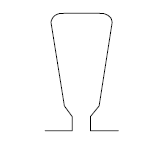

In [41]:
from IPython.display import Image
Image(filename='statorslot.png', width=200, height=300)

In [42]:
Bts= 1.55 #tooth flux density
Kfe=0.96  
bts=(Bg*taus*L)/(Bts*L*Kfe) #tooth width in m
print('Tooth width is',round(bts*1000,2),'mm')

Tooth width is 7.21 mm


In [43]:
hw=1.5*(10**-3)
hos=1*(10**-3)
bos=2.2*(10**-3)
bs1=((math.pi*(Dis+2*hos+2*hw))/Ns)-bts #lower slot width in m
print('Lower slot width is',round(bs1*1000,2),'mm')
bs2=math.sqrt(4*Asu*1e-6*math.tan(math.pi/Ns)+(bs1**2)) #upper slot width in m
print('Upper slot width is',round(bs2*1000,2),'mm')
hs=(2*Asu*1e-6)/(bs1+bs2)  #slot useful height in m
print('The slot useful height is',round(hs*1000,2),'mm')

Lower slot width is 7.82 mm
Upper slot width is 11.8 mm
The slot useful height is 30.38 mm


The following figure shows the stator slot geometry,

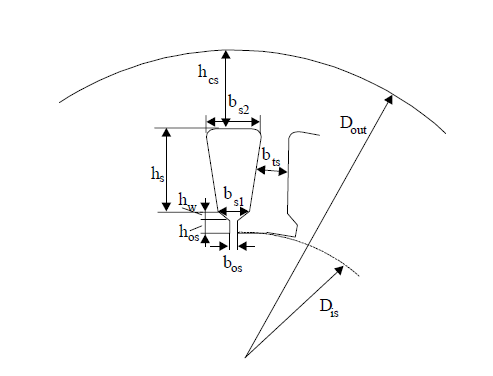

In [44]:
from IPython.display import Image
Image(filename='slotgeometry.png', width=400, height=400)

In [45]:
mu_zero=4*math.pi*(10**-7)
Fmg=(1.2*g*Bg)/mu_zero   #airgap mmf in A-turns
print('The airgap mmf is',round(Fmg,2),'Aturns')

The airgap mmf is 619.73 Aturns


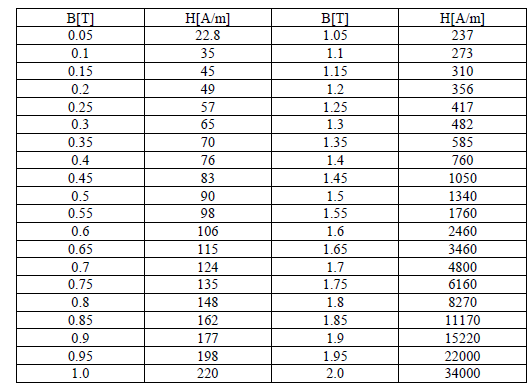

In [46]:
from IPython.display import Image
Image(filename='lam-mag-curve.png', width=400, height=400)

From the lamination magnetization curve for Bts=1.55T Hts=1760 A/m

In [47]:
Hts=1760 
Kst=0.4 #tooth saturation factor
Fmts=Hts*(hs+hos+hw)  #stator tooth mmf
Fmtr=Kst*Fmg-Fmts     #rotor tooth mmf
print('The stator tooth mmf is',round(Fmts,2),'Aturns')
print('The rotor tooth mmf is',round(Fmtr,2),'Aturns')

The stator tooth mmf is 57.86 Aturns
The rotor tooth mmf is 190.03 Aturns


In [48]:
hcs=(Dout-(Dis+2*(hos+hw+hs)))/2  #stator back iron height
print('Stator back iron height is',round(hcs,5),'m')
Bcs=(phi)/(2*L*hcs)  #back core flux density
print('Back core flux density is',round(Bcs,2),'T')

Stator back iron height is 0.03596 m
Back core flux density is 1.16 T


If Bcs is too large, there are some ways to solve this problem. One of is to simply increase the stator outer diameter until Bcs equals to 1.4-1.7 T. The second solution is increase aspect ratio which eventually would result in a smaller Dis and larger back iron height hcs and thus a lower Bcs. The third solution is to increase current density and thus reduce slot height hs.

### 2.4.Rotor Slots

The most adequate number of stator and rotor slot combinations given in the following table,

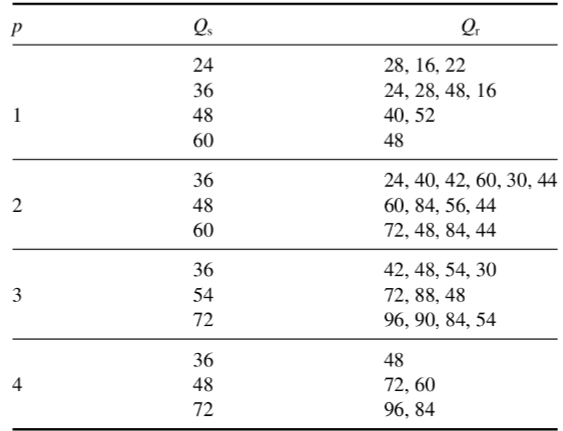

In [49]:
from IPython.display import Image
Image(filename='stator-rotor-slot-numbers.png', width=400, height=400)

Our stator slot number was 48  and we can choose the rotor slot number as 64. The rotor geomety is shown in the following figure,

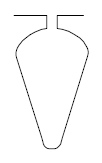

In [50]:
from IPython.display import Image
Image(filename='rotorgeometry.png', width=100, height=100)

Now, we must calculate the value of rated rotor bar current, <br />
$I_b=K_I\frac{2mW_1K_{w1}}{N_r}I_{1n}\qquad$

In [51]:
KI=0.8*pf+0.2
Nr=64  #rotor slot number
Ib=(KI*2*m*W1*Kw1*Iin)/Nr  #rotor bar current in A
print('Rotor bar current is',round(Ib,2),'A')

Rotor bar current is 436.44 A


In [52]:
Jb=3.42 #current density in the rotor in A/mm^2
Ab=Ib/(Jb*10**6)  #rotor slot area in m^2
print('Rotor slot area is',round(Ab,6),'m^2')

Rotor slot area is 0.000128 m^2


In [53]:
Jer=0.75*Jb #current density in end ring in A/m^2
Ier=Ib/(2*math.sin(math.pi*pp/Nr)) #end ring current
Aer=Ier/(Jer*10**(6)) #end ring cross section in m^2
print('End ring current is',round(Ier,2),'A')
print('End ring cross section area is',round(Aer,6),'m^2')

End ring current is 2226.34 A
End ring cross section area is 0.000868 m^2


The rotor slot pitch is <br />
$\tau_r=\frac{\pi(D_{is}-2g)}{N_r}\qquad$

In [54]:
hor=0.5*(10**(-3))
bor=1.5*(10**(-3))
taur=math.pi*(Dis-(2*g))/Nr #rotor slot pitch
print('Rotor slot pitch is',round(taur,5),'m')
Btr=1.60 #rotor tooth flux density
btr=(Bg)/(Kfe*Btr)*taur  #rotor tooth width
print('Rotor tooth width is',round(btr,6),'m')
Dre=Dis-2*g  #rotor diameter
d1=(math.pi*(Dre-2.0*hor)-Nr*btr)/(math.pi+Nr) #upper diameter
print('Upper slot diameter is',round(d1,6),'m')
d2=math.sqrt((8.0*math.tan(math.pi/Nr)*Ab-math.pi*(d1**2)*math.tan(math.pi/Nr)-2.0*(d1**2)/(math.pi*math.tan(math.pi/Nr)-2.0)))/3 
            #lower diameter
print('Lower slot diameter is',round(d2,6),'m') 
hr=(d1-d2)/(2*math.tan(math.pi/Nr))   #rotor slot height
print('Rotor slot height is',round(hr,6),'m')
Htr=2460
Fmtr=Htr*(hr+hor+(d1+d2)/2) #rotor teeth mmf in A-turns
print('Rotor teeth mmf is',round(Fmtr,2),'Aturns')


Rotor slot pitch is 0.01094 m
Rotor tooth width is 0.005195 m
Upper slot diameter is 0.005429 m
Lower slot diameter is 0.002935 m
Rotor slot height is 0.025379 m
Rotor teeth mmf is 73.95 Aturns


In [55]:
Bcr=1.65 #rotor back core flux density
hcr=(phi)/(2*L*Bcr) #rotor back core height
print('Rotor back core height is',round(hcr,4),'m')
Dshmax=Dis-(2*g)-2*(hor+(d1+d2)/2+hr+hcr) #maximum diameter of the shaft
print('The maximum diameter of the shaft is',round(Dshmax*1000,4),'mm')
Sn=0.02 #rated shaft torque
Ten=Pmax/(2*math.pi*freq*(1-Sn)/pp)  #rated torque
print('Rated torque is',round(Ten,2),'Nm')

Rotor back core height is 0.0253 m
The maximum diameter of the shaft is 112.0702 mm
Rated torque is 432.74 Nm


In [56]:
b=1.1*(hr+hor+(d1+d2)/2.0)  #End ring height in m
a=Aer/b                     #End ring width in m
print('End ring height is',round(b,6),'m')
print('End ring width is',round(a,6),'m')

End ring height is 0.033067 m
End ring width is 0.026248 m


The rotor geometry is shown in the following figure

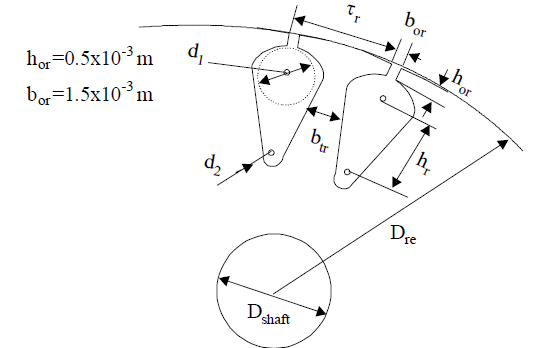

In [57]:
from IPython.display import Image
Image(filename='rotorslotgeometry.png', width=400, height=400)

### 2.5.The Magnetization Current

The magnetization mmf is <br />
$F_{1m}=2(K_cg\frac{B_g}{\mu_0}+F_{mts}+F_{mtr}+F_{mcs}+F_{mcr})\qquad$ where $K_c=K_{c1}K_{c2}\qquad$ <br />
and, $K_{c1}=\frac{\tau_s}{\tau_s-\gamma_1} \qquad$ ; $K_{c2}=\frac{\tau_r}{\tau_r-\gamma_2}\qquad$ ;  $\gamma_1=\frac{b_{os}^2}{5g+b_{os}}\qquad$ ,  $\gamma_2=\frac{b_{or}^2}{5g+b_{or}}\qquad$

In [58]:
gamma1=(bos**2)/(5*g+bos)
gamma2=(bor**2)/(5*g+bor)
Kc1=taus/(taus-gamma1)
Kc2=(taur)/(taur-gamma2)
Kc=Kc1*Kc2  #Carter's coefficient
print('Carters coefficient is',round(Kc,3))

Carters coefficient is 1.09


The back core mmfs, <br />
$F_{mcs}=C_{cs}\frac{\pi(D_{out}-h_{cs})}{2p_1}H_{cs}(B_{cs})\qquad$ <br />
$F_{mcr}=C_{cr}\frac{\pi(D_{shaft}+h_{cr})}{2p_1}H_{cr}(B_{cr})\qquad$ <br />

In [59]:
Ccs=0.88*math.exp((-0.4)*(Bcs**2))
Ccr=0.88*math.exp((-0.4)*(Bcr**2))
Hcs=237
Hcr=3460
Fmcs=Ccs*(math.pi*(Dout-hcs)/(2*pp))*Hcs #Stator back core mmf
print('Stator back core mmf is',round(Fmcs,2),'Aturns')
Fmcr=Ccr*((math.pi*(Dshmax+hcr))/(2*pp))*Hcr #Rotor back core mmf
print('Rotor back core mmf is',round(Fmcr,2),'Aturns')

Stator back core mmf is 31.14 Aturns
Rotor back core mmf is 110.59 Aturns


In [60]:
mu_zero=4*math.pi*10**(-7)
F1m=2*((Kc*g*Bg/mu_zero)+Fmts+Fmtr+Fmcs+Fmcr)  #magnetization mmf 
print('The magnetization mmf is',round(F1m,2),'Aturns')

The magnetization mmf is 1672.7 Aturns


The total saturation factor, <br />
$K_s=\frac{F_{1m}}{2F_{mg}}-1 \qquad$ <br />


In [61]:
Ks=(F1m/(2*Fmg))-1

The magnetization current,
$I_\mu=\frac{\pi{pp}(F_{1m}/2)}{3\sqrt2W_1K_{w1}}\qquad$

In [62]:
Imu=(math.pi*pp*(F1m/2))/(3*math.sqrt(2)*W1*Kw1) #magnetization current
print('The magnetization current is',round(Imu,2),'A')
imu=Imu/Iin  #Relative value of magnetization current
print('The relative value of the magnetization current is',round(imu,3))

The magnetization current is 167.37 A
The relative value of the magnetization current is 0.232


### 2.6.Resistances and Inductances

The resistances and inductances refer to the equivalent circuit is shown in figure below,

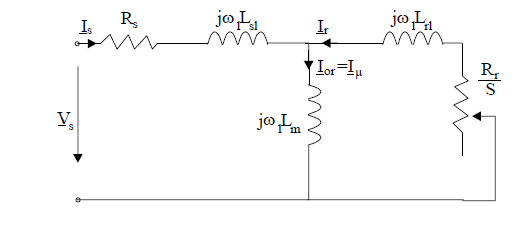

In [63]:
from IPython.display import Image
Image(filename='equivalentcircuit.png', width=500, height=500)

The stator phase resistance, <br />
$R_s=\rho{\frac{l_cW_1}{A_{co}a_1}}\qquad$

In [64]:
y=tau*5/6
lend=2*y-0.02  #end connection length in m 
print('End connection length is',round(lend,5),'m')
lc=2*(L+lend)  #coil length
print('Coil length is',round(lc,5),'m')
rho_co=2.1712*10**(-8)  #resistivity at 80 °C in ohm-m
Rs=rho_co*lc*W1/(ACo*1e-6*a1) #stator phase resistance 
print('Stator phase resistance is',round(Rs,5),'ohm')

End connection length is 0.27405 m
Coil length is 1.0774 m
Stator phase resistance is 0.00143 ohm


The rotor bar/end segment equivalent resistance, <br />
$R_{be}=\rho_{Al}(\frac{L}{A_b}K_R+\frac{l_{er}}{2A_{er}sin(\frac{\pi{p_1}}{N_r})^2})\qquad$


In [65]:
rho_Al=3.1*10**(-8) #cast aliminium resistivity
ler=math.pi*(Dre-b)/Nr #end ring segment length
betas=math.sqrt((2*math.pi*freq*mu_zero)/(2*rho_Al))
S=1
KR=betas*hr*math.sqrt(S)

 
Rbe=rho_Al*(L/Ab*KR+ler/(2*Aer*math.pow(math.sin(math.pi*pp/Nr),2))) #rotor bar/end ring segment equivalent resistance
print('Rotor bar/end ring segment equivalent resistance is',round(Rbe,5),'ohm')

Rr_prime=4*m/Nr*math.pow(W1*Kw1,2)*Rbe #rotor cage resistance reduced to the stator
print('Rotor cage resistance reduced to the stator is',round(Rr_prime,5),'ohm')

#lambda_s,lambda_ds and lambda_ec are the slot differential and end ring connection coefficients
beta=5/6
lambda_s=(2.0/3.0*hs/(bs1+bs2)+2.0*hw/(bos+bs1)+hos/bos)*(1.0+3.0*beta)/4.0

Cs=1-0.033*(bos**2/(g*taus))
phi1=math.pi*(6*beta-5.5)
gamadc=(0.14*math.sin(phi1)+0.76)*10**(-2)
lambda_ds=(0.9*taus*q**2*Kw1**2*Cs*gamadc)/(Kc*g*(1+Kst))
lambda_ec=0.34*q*(lend-(0.64*beta*tau))/L

Xsl=2.0*4.0*math.pi*10**-7*2.0*math.pi*freq*L*math.pow(W1,2.0)/(pp*q)*(lambda_s+lambda_ds+lambda_ec) #stator phase reactance
print('Stator phase reactance is',round(Xsl,5),'ohm')


lambda_r=(0.66+2*hr/(3*d1+3*d2)+(hor/bor))
gamadr=9*36*pp*pp*10**(-2)/(Nr*Nr)
lambda_dr=0.9*taur*gamadr*Nr*Nr/(Kc*g*36*pp*pp)
lambda_er=2.3*(Dre-b)/(Nr*L*4*math.sin(math.pi*pp/Nr)**2)
Kx=3/(2*KR)

Xbe=2*math.pi*freq*mu_zero*L*(lambda_r*Kx+lambda_dr+lambda_er) #equivalent rotor bar reactance 
print('Equivalent rotor bar reactance is',round(Xbe,5),'ohm')

Xrl=4*m*W1*W1*Kw1*Kw1*Xbe/Nr  #rotor leakage reactance
print('Rotor leakage reactance is',round(Xrl,5),'ohm')

Xs1sat=Xsl*0.75
Xrlsat=Xrl*0.65

RbeSn=rho_Al*(L/Ab+ler/(2.0*Aer*(math.sin(math.pi*pp/Nr)**2)))
Rr_primeSn=Rr_prime*RbeSn/Rbe  #rotor resistance at rated speed
print('Rotor resistance at rated speed is',round(Rr_primeSn,5),'ohm')

Xm=Xm=math.sqrt(math.pow(Vbat_ln/Imu,2)-Rs*Rs)-Xsl #magnetization reactance
print('The magnetization reactance is',round(Xm,3),'ohm')


Rotor bar/end ring segment equivalent resistance is 0.00029 ohm
Rotor cage resistance reduced to the stator is 0.00294 ohm
Stator phase reactance is 0.02363 ohm
Equivalent rotor bar reactance is 0.00119 ohm
Rotor leakage reactance is 0.01223 ohm
Rotor resistance at rated speed is 0.00084 ohm
The magnetization reactance is 0.952 ohm


In general, the rotor slots are skewed. A skewing C of one stator slot pitch $\tau_s$ is typical ($c=\tau_s$)

In [66]:
Kskew=math.sin(math.pi/(2*m*q))/(math.pi/(2*m*q)) #Skewing factor
Xm=Xm*Kskew #magnetization reactance including skewing 
print('Magnetization reactance including skewing is',round(Xm,3),'Ohm')
Xrlskew=Xm*(1-(Kskew*Kskew))  #rotor leakage reactance with skewing
print('Rotor leakage reactance including skewing is',round(Xrlskew,3),'Ohm')
Xrlsatskew=Xrlsat+Xrlskew #final value of rotor leakage reactance at S=1
print('Rotor leakagereactance at S=1 is',round(Xrlsatskew,3),'Ohm')
XrlSnskew=Xrl+Xrlskew #final value of rotor leakage reactance at S=Sn
print('Rotor leakagereactance at S=Sn is',round(XrlSnskew,3),'Ohm')

Magnetization reactance including skewing is 0.949 Ohm
Rotor leakage reactance including skewing is 0.005 Ohm
Rotor leakagereactance at S=1 is 0.013 Ohm
Rotor leakagereactance at S=Sn is 0.018 Ohm


### 2.7.Losses and Efficiency

The efficiency is defined as output per input power is,<br />
$\eta=\frac{P_{out}}{P_{in}}\qquad$ where $P_{in}=P_{in}+P_{losses}\qquad$

The loss components are stator winding losses, rotor cage losses, core loss, mechanical/ventilation losses, and stray losses.

In [67]:
Pcu_loss_stator=3*Rs*Iin*Iin #Stator winding losses in watts
print('Stator winding losses are',round(Pcu_loss_stator,3),'W' )
PAl=3*Rr_primeSn*KI*KI*Iin*Iin #rotor cage losses in watts
print('Rotor winding losses are',round(PAl,3),'W' )
Pmv=0.012*Pmax #mechanical/ventilation losses for two pole-pair in watts
print('Mechanical/ventilation losses are',round(Pmv,3),'W' )
Pstray=0.01*Pmax #stray losses in watts
print('Stray losses are',round(Pstray,3),'W' )

Stator winding losses are 2227.617 W
Rotor winding losses are 994.822 W
Mechanical/ventilation losses are 3420.0 W
Stray losses are 2850.0 W


#### 2.7.1.Weight

In [68]:
gama_iron=7800 
Gt1=gama_iron*Ns*bts*(hs+hw+hos)*L*Kfe #stator tooth weight in kg
print('Stator tooth weight is',round(Gt1,2),'kg')
Gy1=gama_iron*math.pi/4*(Dout*Dout-math.pow(Dout-2*hcs,2))*L*Kfe #yoke weight in kg
print('Yoke weight is',round(Gy1,2),'kg')
Gtr=gama_iron*L*Kfe*Nr*(hr+(d1+d2)/2)*btr #Rotor teeth weight in kg
print('Rotor teeth weight is',round(Gtr,2),'kg')
Gs=Gt1+Gy1 #stator iron weight in kg
print('Stator iron core weight is',round(Gs,2),'kg')
Gyr=gama_iron*math.pi/4*(math.pow(Dre-2*(hor+(d1+d2)/2+hr),2)-math.pow(Dshmax,2))*L*Kfe #rotor yoke weight in kg
Gr=Gtr+Gyr #rotor iron weight in kg
print('Rotor iron core weight is',round(Gr,2),'kg')
Gcu_stator=8940*lc*W1*ACo*1e-6*m #Stator copper weight in kg
print('Stator copper weight is',round(Gcu_stator,2),'kg')
Gcu_rotor=8940*(Ab*L+Aer*ler)*Nr #Rotor copper weight in kg
print('Rotor copper weight is',round(Gcu_rotor,2),'kg')
Gshaft=gama_iron*math.pi/4*Dshmax*Dshmax #Shaft weight in kg
print('Shaft weight is',round(Gshaft,2),'kg')
Gtotal=Gs+Gr+Gcu_stator+Gcu_rotor+Gshaft #Total motor weight 
print('Total weight is',round(Gtotal,2),'kg')

Stator tooth weight is 22.54 kg
Yoke weight is 73.07 kg
Rotor teeth weight is 19.48 kg
Stator iron core weight is 95.61 kg
Rotor iron core weight is 41.15 kg
Stator copper weight is 15.16 kg
Rotor copper weight is 23.95 kg
Shaft weight is 76.94 kg
Total weight is 252.81 kg


In [69]:
Kt=1.7  #core loss augmentation 
p10=2 #specific losses at 1 Tesla and 50 Hz
Ky=1.6 #influence of mechanical machining
Py1=Ky*p10*math.pow(freq/50,1.3)*math.pow(Bcs,1.7)*Gy1 #stator back iron fundamental losses in Watts
print('Stator back iron fundamental losses are',round(Py1,3),'W')
Pt1=Kt*p10*math.pow(freq/50,1.3)*math.pow(Bts,1.7)*Gt1 #stator teeth fundamental losses in Watts
print('Stator teeth fundamental losses are',round(Pt1,3),'W')
P1iron=Pt1+Py1 #fundamental iron losses in Watts
print('Fundamental iron losses are',round(P1iron,3),'W')

Stator back iron fundamental losses are 1997.999 W
Stator teeth fundamental losses are 1068.198 W
Fundamental iron losses are 3066.198 W


In [70]:
Kps=1/(2.2-Bts)
Kpr=1/(2.2-Btr)
Bps=(Kc2-1)*Bg #Stator pulse flux density in Tesla
print('Stator pulse flux density is',round(Bps,3),'T')
Bpr=(Kc1-1)*Bg #Rotor pulse flux density in Tesla
print('Rotor pulse flux density is',round(Bpr,3),'T')


Stator pulse flux density is 0.026 T
Rotor pulse flux density is 0.038 T


In [71]:
Ps_iron=0.5e-4*(math.pow(Nr*freq/pp*Kps*Bps,2)*Gt1+math.pow(Ns*freq/pp*Kpr*Bpr,2)*Gtr) #tooth flux pulsation core loss in watts
print('Tooth flux pulsation core loss is',round(Ps_iron,3),'W')
P_iron=P1iron+Ps_iron #total iron losses in watts
print('Total iron losses are',round(P_iron,3),'W')
Ploss=Pcu_loss_stator+PAl+P_iron+Pmv+Pstray #Total losses in W
print('Total losses are',round(Ploss,3),'W')
eff_analy=Pmax/(Pmax+Ploss)*100 #Efficiency 
print('Analytically calculated efficiency is',round(eff_analy,2),'%')


Tooth flux pulsation core loss is 188.26 W
Total iron losses are 3254.458 W
Total losses are 12746.896 W
Analytically calculated efficiency is 95.72 %


In the beginning of the design we assumed that the efficiency is nearly 96 %, analytically calculated efficiecy is less than the assumed value by 0.28% which is acceptable.

### 2.8.Temperature Rise

In [102]:
lambda_ins=0.25 #insulation thermal conductivity 
h_ins=0.3e-3 #total insulation thickness from the slot middle to teeth wall 
alpha_cond=lambda_ins/h_ins #slot insulation conductivity plus its thickness lumped into alpha_cond 

In [103]:
Als=(2*hs+bs2)*L*Ns #stator slot lateral area in m^2
print ('Stator slot lateral area is',round(Als,3),'m^2')

Stator slot lateral area is 0.922 m^2


In [104]:
Kfin=3 #finn area coefficient
Aframe=math.pi*Dout*(L+tau)*Kfin #frame area in m^2
print ('Frame area is',round(Aframe,3),'m^2')

Frame area is 1.506 m^2


In [116]:
deltetaco=rho_co/(alpha_cond*Als) #temperature differential between the conductors in slots and the slot wall 
alpha_conv=50*5 #for 2pp=4 and forced cooling
deltetaframe=Ploss/(alpha_conv*Aframe) #frame temperature rise with respect to ambient air 
print ('Frame temperature rise is',round(deltetaframe,2),'°C')

Frame temperature rise is 33.85 °C


In [118]:
teta_amb=40 #ambient temperature 
teta_co=teta_amb+deltetaco+deltetaframe #winding temperature
print ('Winding temperature is',round(teta_co,2),'°C')

Winding temperature is 73.85 °C


The winding temperature is smaller than 80°C, then it is acceptable.

## 3.Simulations

Our analytically designed induction motor has been simulated in motor analysis software program. Motor Analysis is a MATLAB GUI for induction motor design.

To use motor analysis program some parameters have should been determined such as stator dimentions, rotor dimensions and axial dimentions.

### 3.1.Geometry

The analytically calculated parameters have been transferred to the motor analysis program. The stator slot, rotor slot and radial cross section geometries can be shown in the following figures.

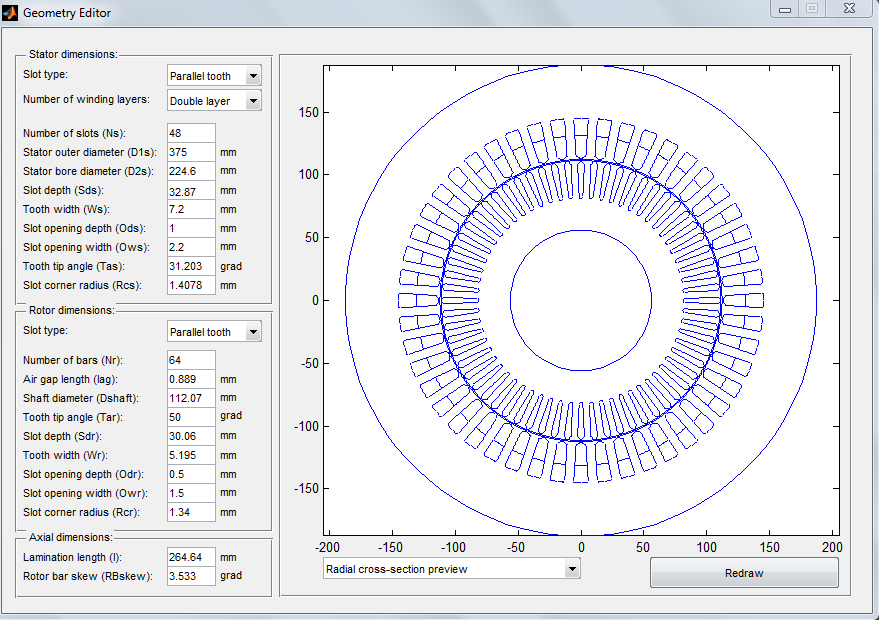

In [72]:
from IPython.display import Image
Image(filename='geometry-MA.png', width=700, height=700)

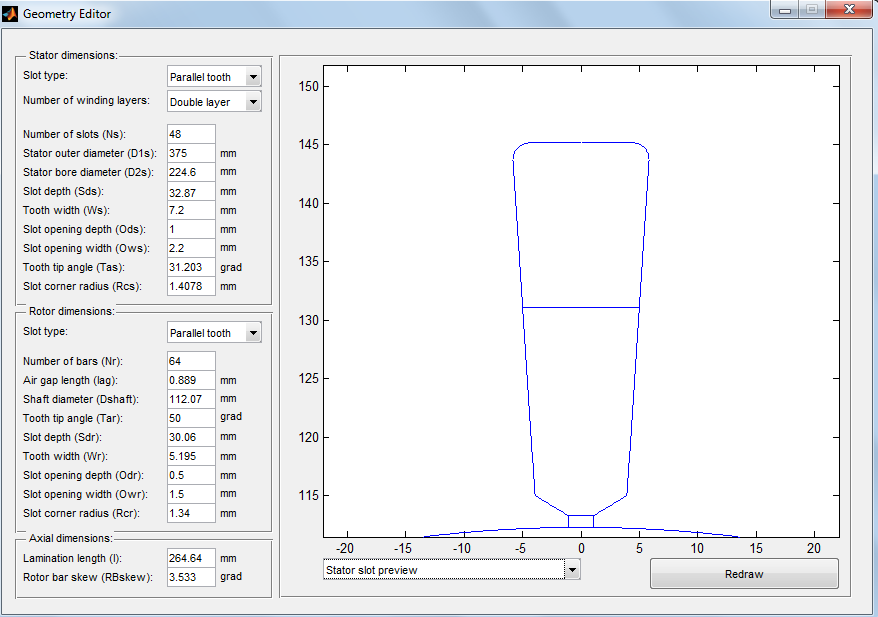

In [73]:
from IPython.display import Image
Image(filename='stator-MA.png', width=700, height=700)

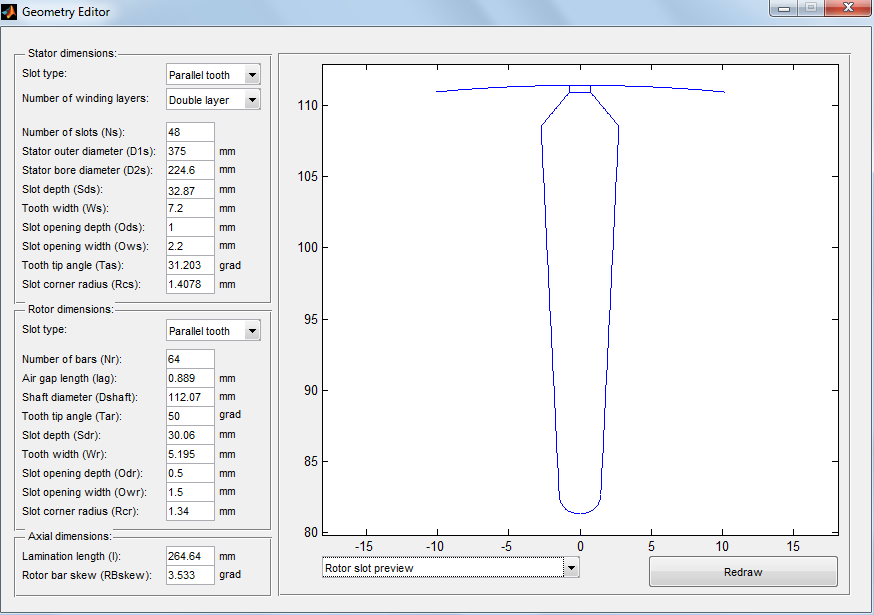

In [74]:
from IPython.display import Image
Image(filename='rotor-MA.png', width=700, height=700)

### 3.2.Windings Property

Here is the winding configuration for 5/6 pitch, double layer stator windings.

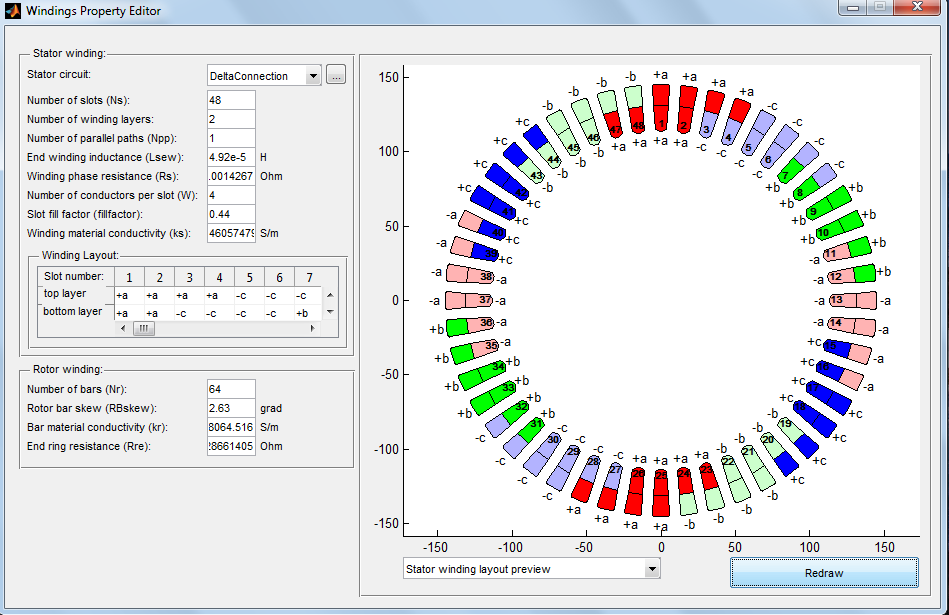

In [75]:
from IPython.display import Image
Image(filename='windings.png', width=700, height=700)

### 3.3.Iron Core Property Editor

The following figure shows the B-H curve of the material. The curve datas are taken from [6].

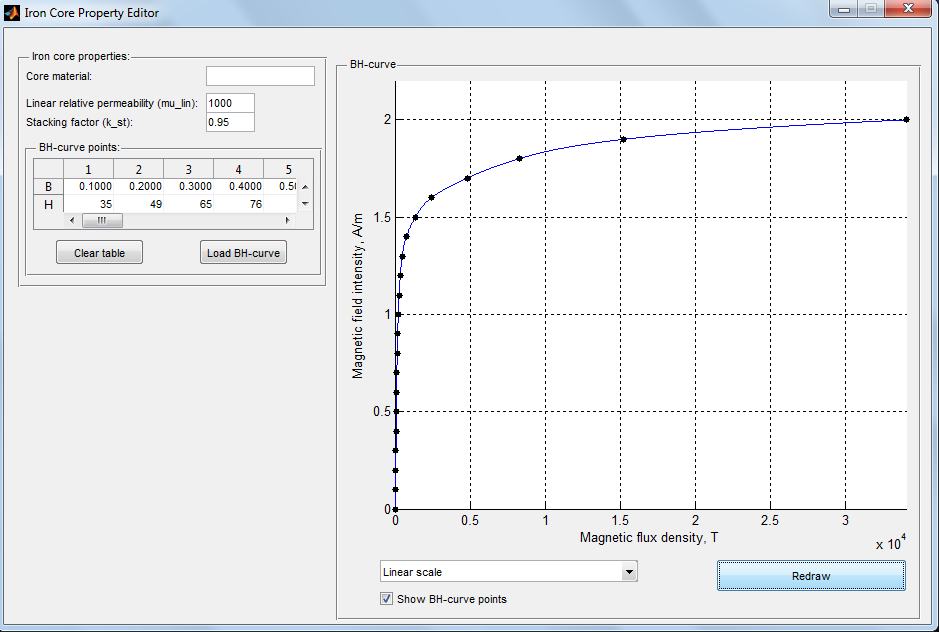

In [76]:
from IPython.display import Image
Image(filename='curve-MA.png', width=700, height=700)

### 3.4.Mesh Editor

The following figure shows the mesh structure.

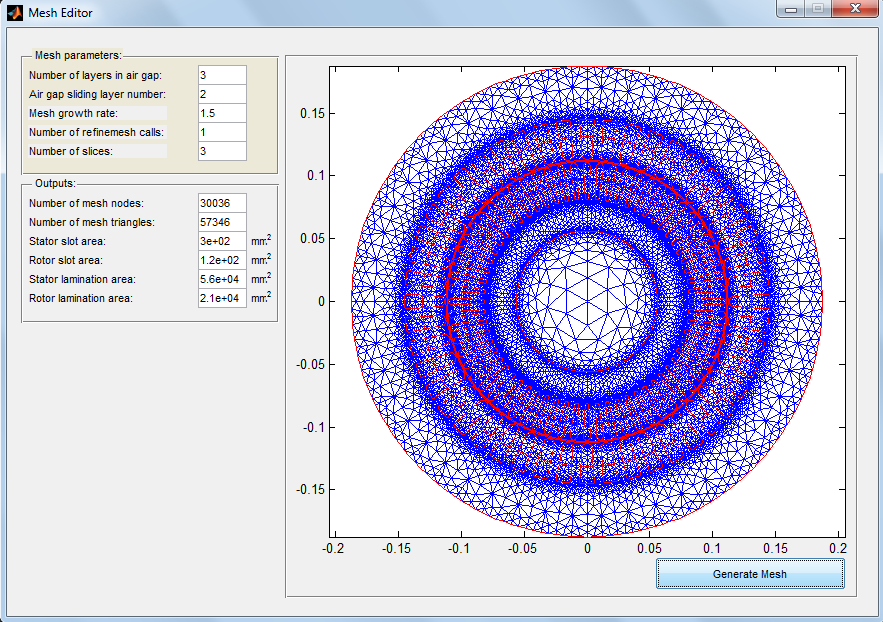

In [77]:
from IPython.display import Image
Image(filename='mesh-MA.png', width=700, height=700)

### 3.5.Simulation Results

After we define the parameters for the simulations in motor analysis program, we are ready to start the simulation.
All obtained results are shown in the following figures.

- **Stator current in phase A : **

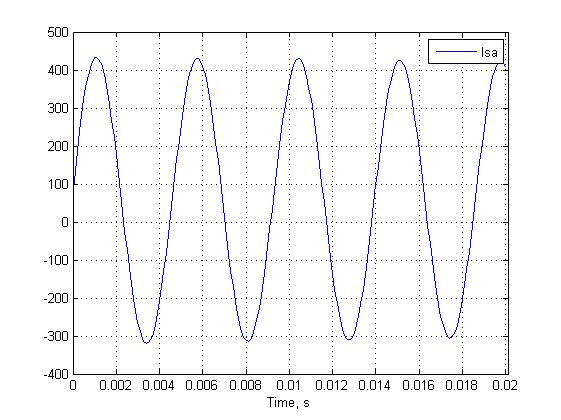

In [78]:
from IPython.display import Image
Image(filename='stator-current-phase-A.jpg', width=500, height=500)

- **Stator current in phase B : **

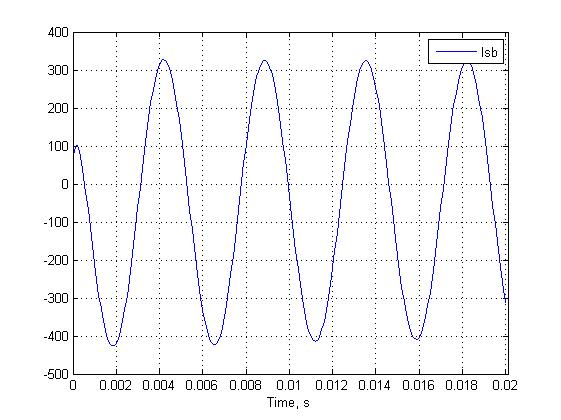

In [79]:
from IPython.display import Image
Image(filename='stator-current-phase-B.jpg', width=500, height=500)

- **Stator current in phase C :**

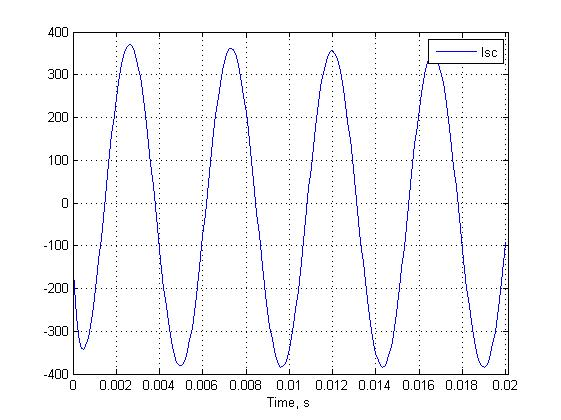

In [80]:
from IPython.display import Image
Image(filename='stator-current-phase-C.jpg', width=500, height=500)

- **Rotor current of bar 1: **

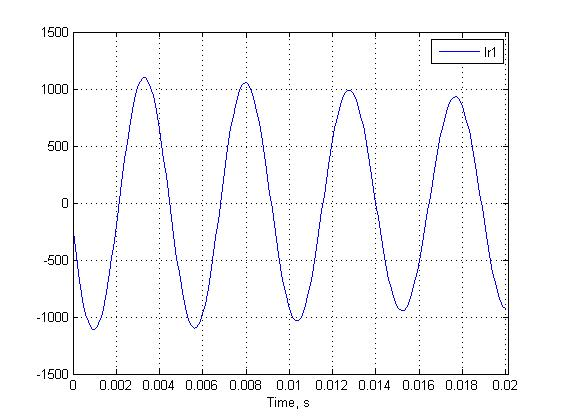

In [81]:
from IPython.display import Image
Image(filename='rotor-current-bar-1.jpg', width=500, height=500)

- **Supply voltage in phase A: **

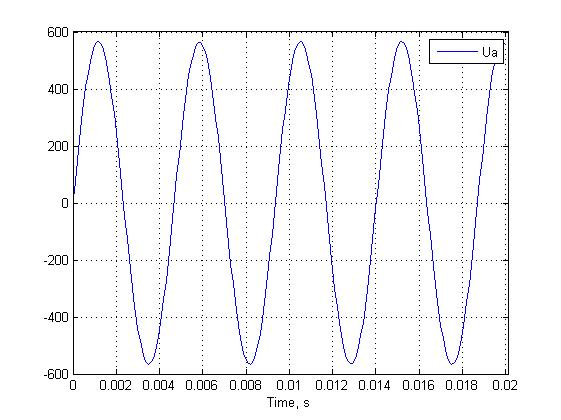

In [82]:
from IPython.display import Image
Image(filename='supply-voltage-A.jpg', width=500, height=500)

- **Input apparent power: **

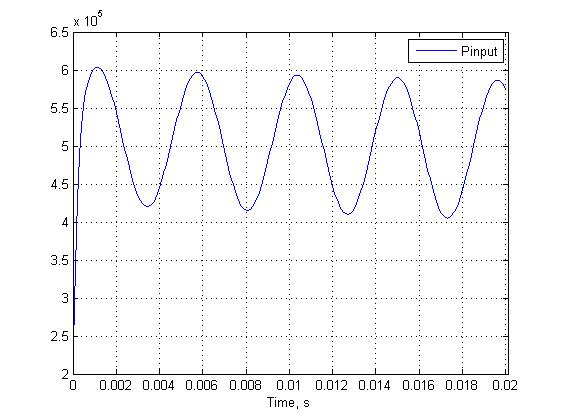

In [83]:
from IPython.display import Image
Image(filename='input-apparent-power.jpg', width=500, height=500)

- **Mechanical power on the rotor shaft: **

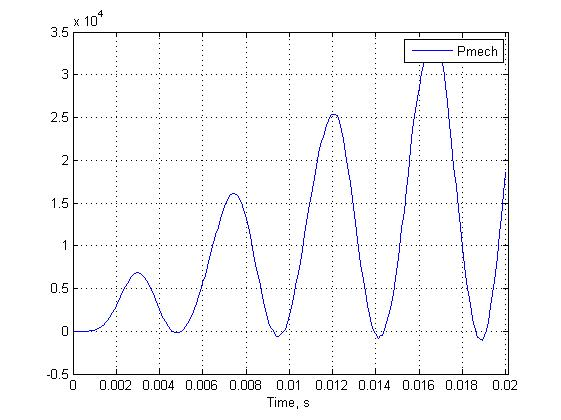

In [84]:
from IPython.display import Image
Image(filename='mechanical-power-rotor-shaft.jpg', width=500, height=500)

- **Electromechanical torque:**

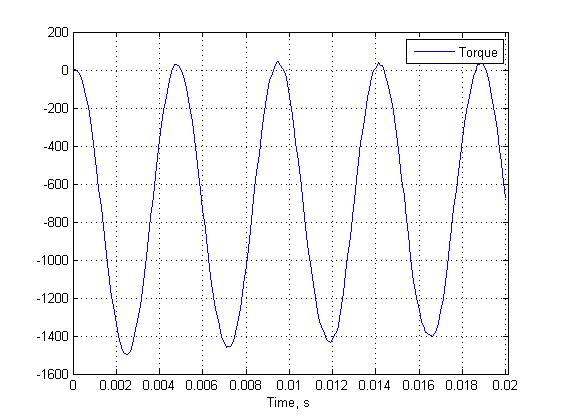

In [85]:
from IPython.display import Image
Image(filename='electromechanical-torque.jpg', width=500, height=500)

- **Rotor angular speed: **

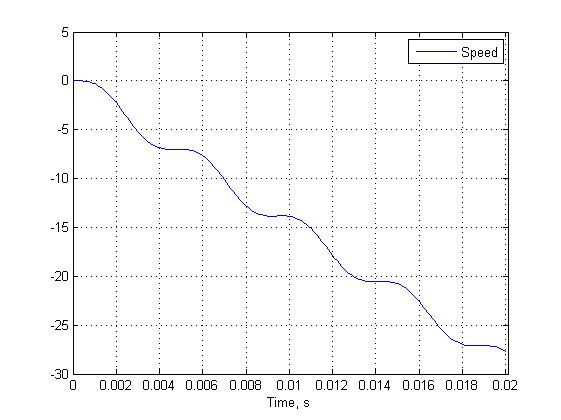

In [86]:
from IPython.display import Image
Image(filename='rotor-angular-speed.jpg', width=500, height=500)

- **Rotor angular position: **

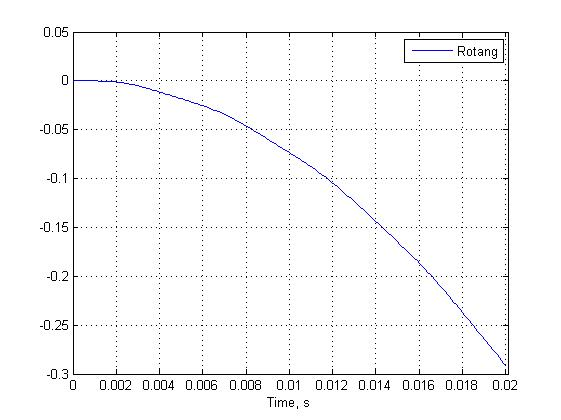

In [87]:
from IPython.display import Image
Image(filename='rotor-angular-position.jpg', width=500, height=500)

- **Airgap magnetomotive force distribution: **

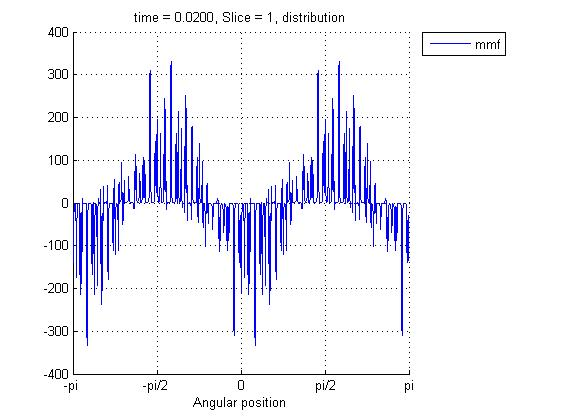

In [88]:
from IPython.display import Image
Image(filename='airgap-mmf.jpg', width=500, height=500)

- ** Airgap flux density magnitude distribution: **

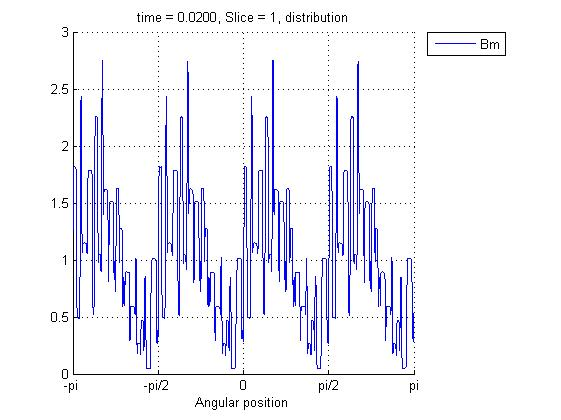

In [89]:
from IPython.display import Image
Image(filename='airgap-Bm.jpg', width=500, height=500)

- **Magnetic flux density:**

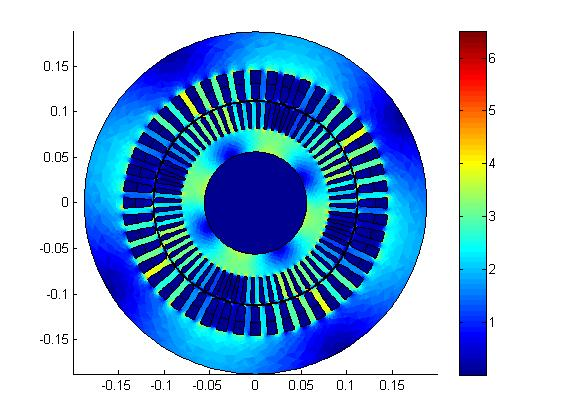

In [90]:
from IPython.display import Image
Image(filename='magnetic-flux-density.jpg', width=500, height=500)

- ** Magnetic vector potential:**

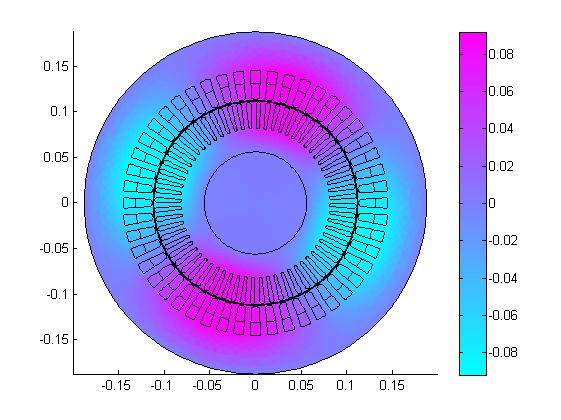

In [91]:
from IPython.display import Image
Image(filename='magnetic-vector-potential.jpg', width=500, height=500)

- **Stator current density:**

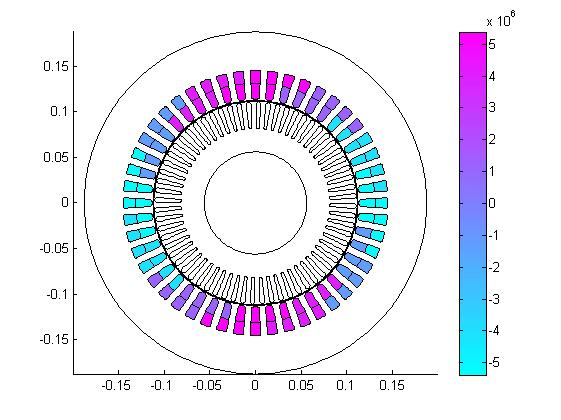

In [92]:
from IPython.display import Image
Image(filename='stator-current-density.jpg', width=500, height=500)

- **Rotor current density:**

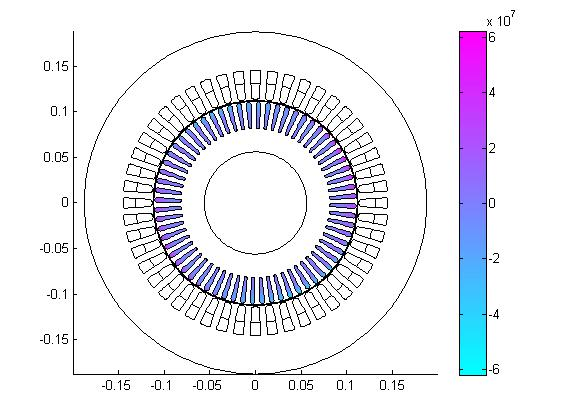

In [93]:
from IPython.display import Image
Image(filename='rotor-current-density.jpg', width=500, height=500)

- **Joule loss:**

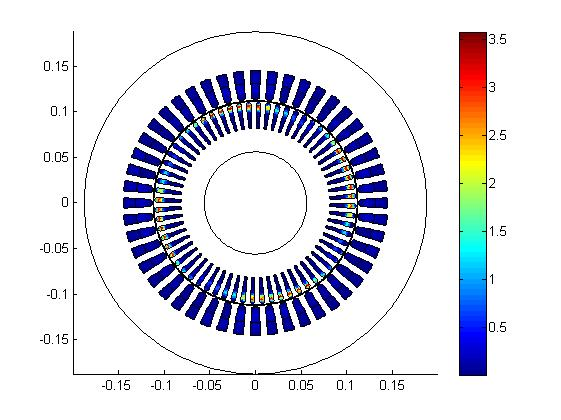

In [94]:
from IPython.display import Image
Image(filename='joule-loss.jpg', width=500, height=500)

## 4.Different Designs

### 4.1.Changing stator slot widths

In thise design, the stator lower slot width has been decreased from 7.82 mm to 1 mm and the stator upper slot width decreased from 11.8 mm to 8 mm. With these new parameters, airgap flux has been calculated as 619.7 Aturns, stator tooth mmf as 120.99 Aturns, rotor tooth mmf as 126.9 Aturns. The total losses have been calculated as 153285.598 Watts, so the efficiency has decreased from 95.72% to 65.03% . The winding temperature has increased from 73.85°C to 447.08 °C. Both the efficiency and the winding temperature values can not be acceptable. <br /> For this design motor analysis program outputs can be seen in the following figures,

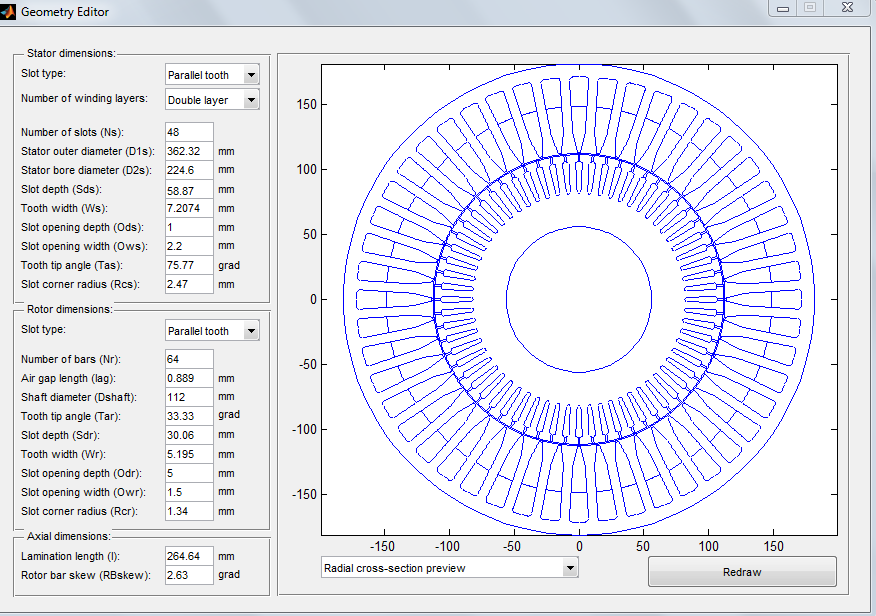

In [6]:
from IPython.display import Image
Image(filename='geometry-W1.png', width=500, height=500)

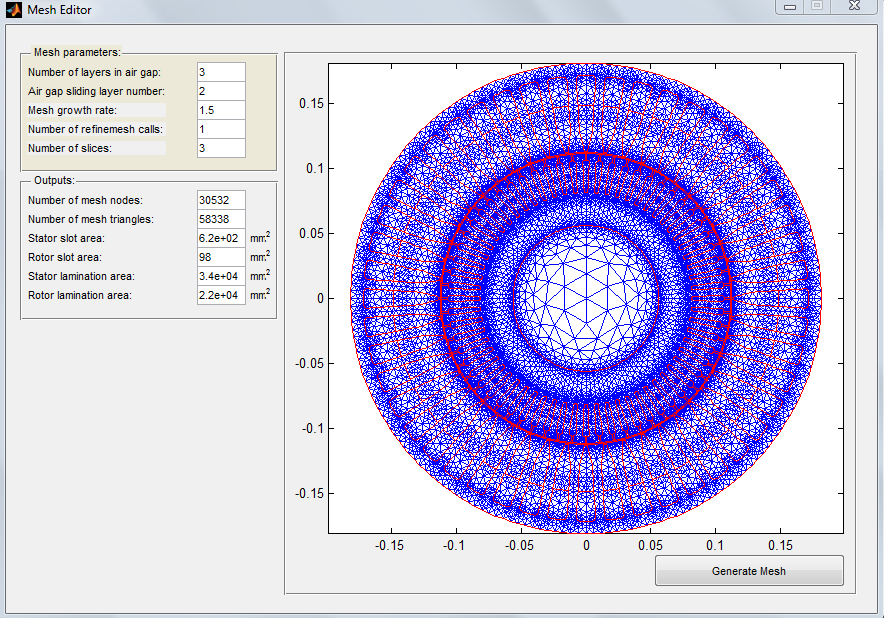

In [7]:
from IPython.display import Image
Image(filename='mesh-W1.png', width=500, height=500)

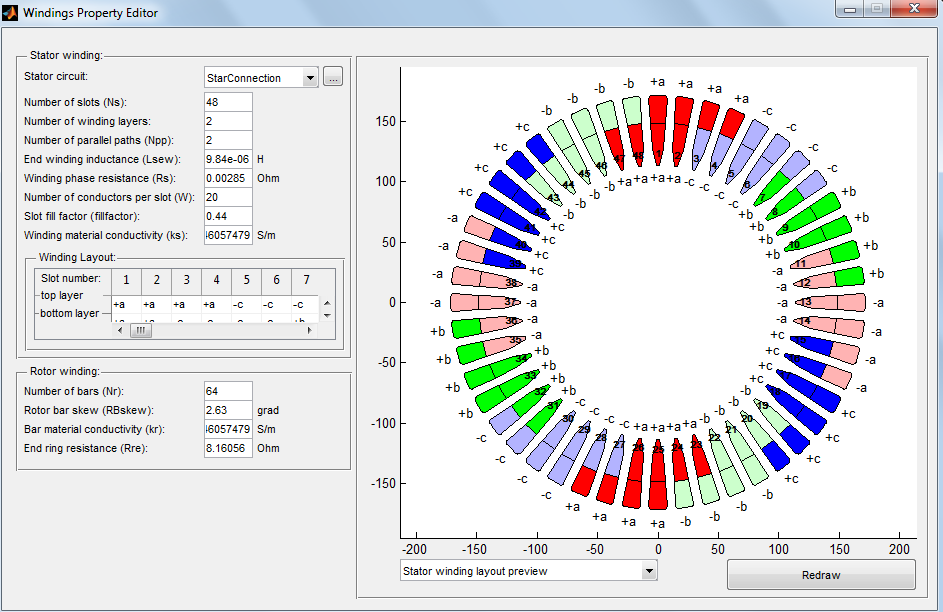

In [8]:
from IPython.display import Image
Image(filename='winding-W1.png', width=500, height=500)

- **Stator currents**

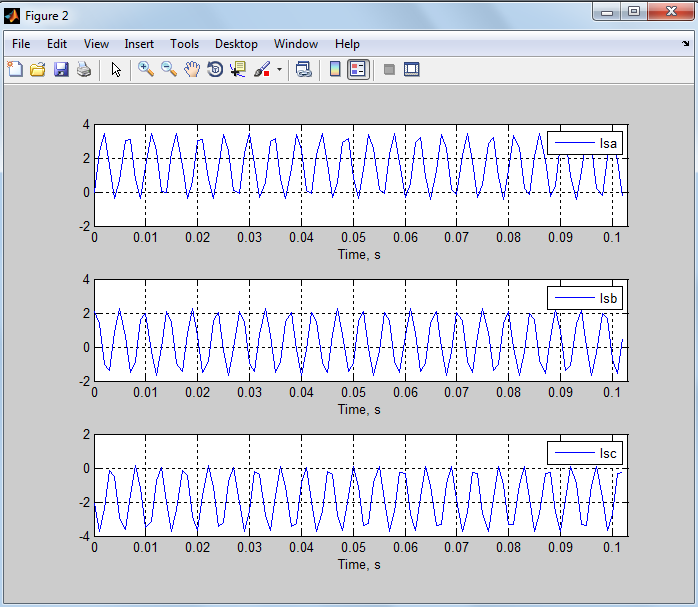

In [9]:
from IPython.display import Image
Image(filename='stator-currents-W1.png', width=500, height=500)

As we can see from the figure, supply voltage values and shapes are not desirable.

- **Rotor currents**

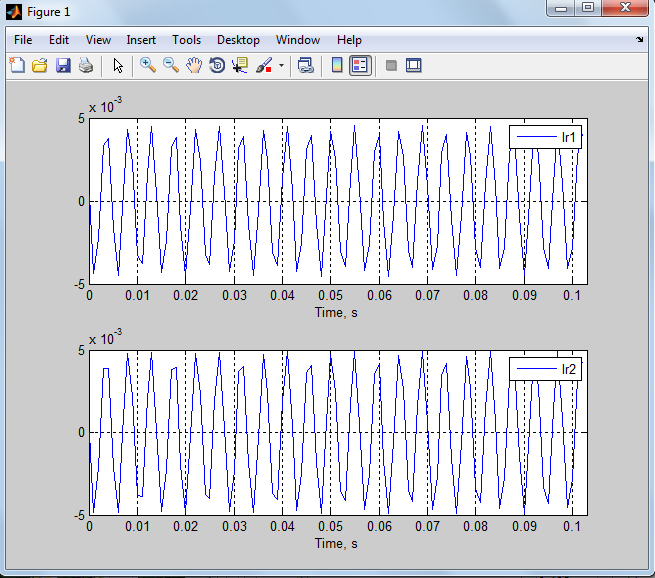

In [10]:
from IPython.display import Image
Image(filename='rotor-currents-W1.png', width=500, height=500)

- **Electromechanical torque**

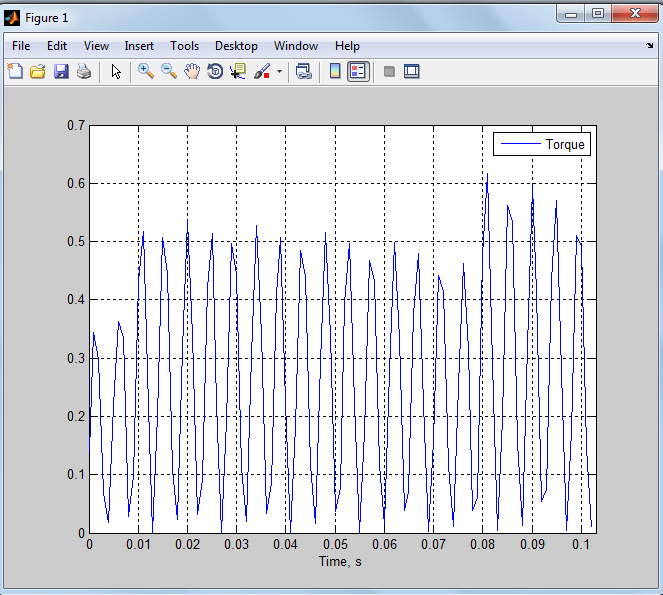

In [11]:
from IPython.display import Image
Image(filename='torque-W1.png', width=500, height=500)

- ** Magnetic flux density **

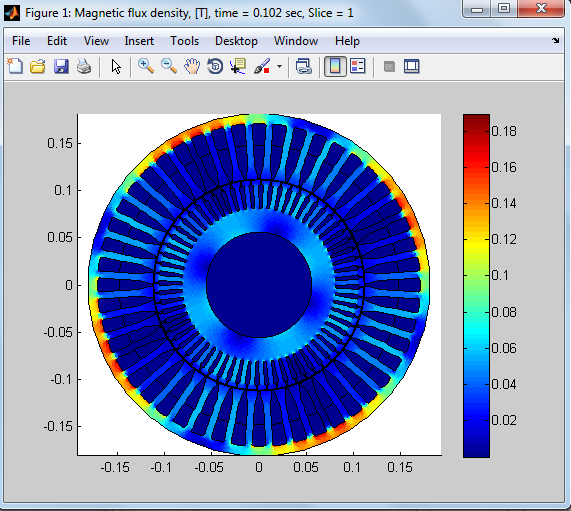

In [12]:
from IPython.display import Image
Image(filename='flux-density-W1.png', width=500, height=500)

- **Current density**

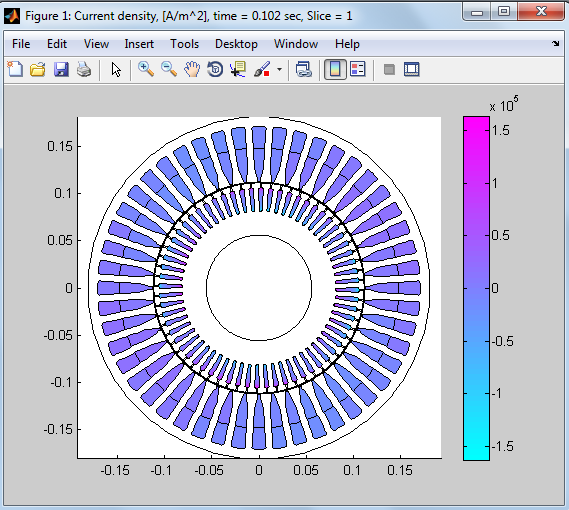

In [13]:
from IPython.display import Image
Image(filename='current-density-W1.png', width=500, height=500)

### 4.2.Changing current density

For this design, the rotor current density has been changed from 3.42 A/m^2 to 20 A/m^2. For this rotor current density rotor slot pitch is 0.01094 m, rotor tooth width is 0.005195 m, upper slot diameter is 0.005429 m, lower slot diameter is 0.001999 m, rotor slot height is 0.034908 m and rtor teeth mmf is 96.24 Aturns. If we look at the efficiency and winding temperatures, the efficiency has decreased from 95.72% to 94.2% this change is acceptable but the winding temperature has increased from 73.85 °C to 96.57 °C. This change in temperature can be leads to changing of cooling method of the induction motor.


The machine structure for this design shown in the following figures;

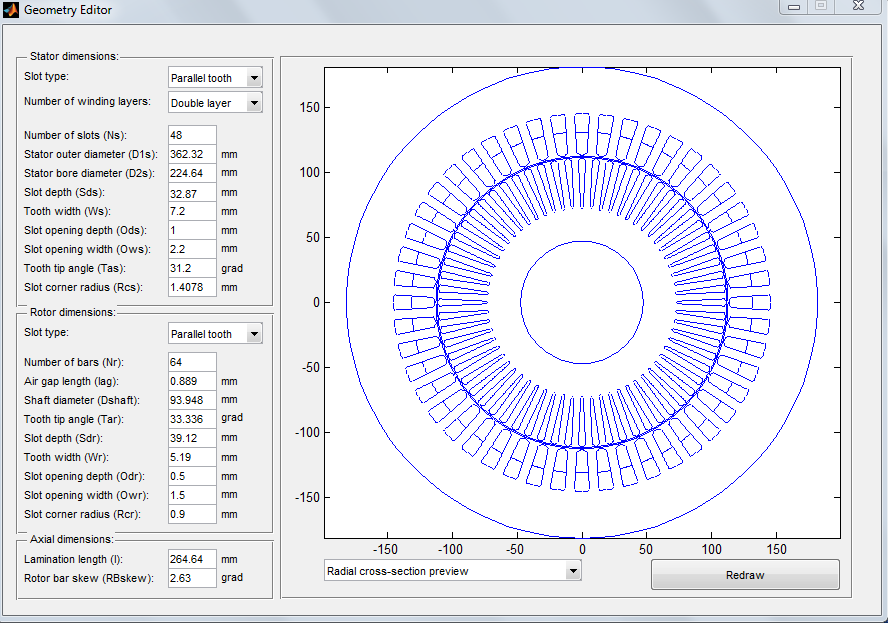

In [1]:
from IPython.display import Image
Image(filename='geometry-W2.png', width=500, height=500)

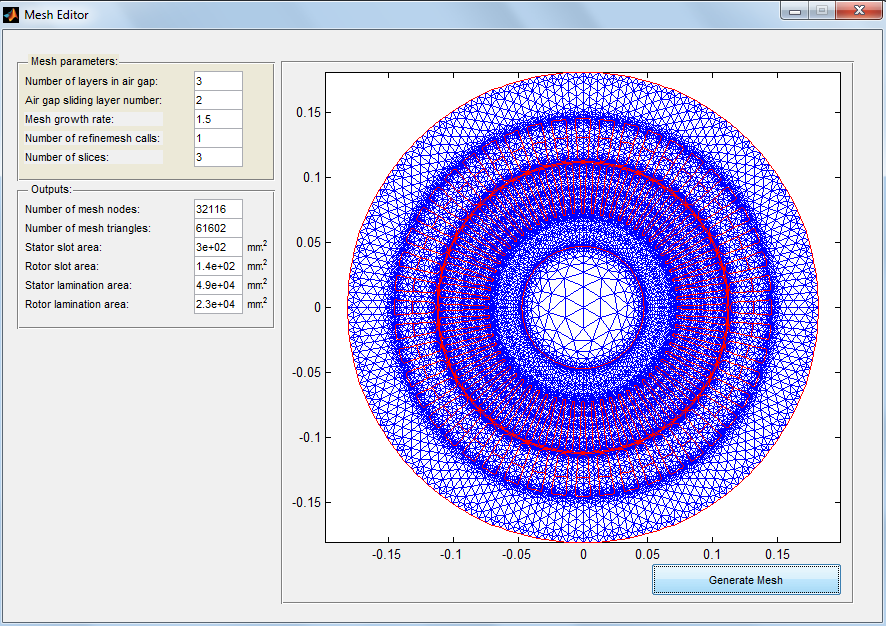

In [2]:
from IPython.display import Image
Image(filename='mesh-W2.png', width=500, height=500)

## 5.Conclusion

## 6.References

[1]https://www.teslamotors.com/en_EU/models?redirect=no <br />
[2]https://en.wikipedia.org/wiki/Tesla_Model_S <br />
[3]http://insideevs.com/video-primer-tesla-model-s-electric-motor/ <br />
[4]http://teslatap.com/undocumented/ <br />
[5]http://shop.teslamotors.com/collections/model-s-wheels-tires-and-tire-covers <br />
[6]I. Boldea and S.A. Nasar, "The Induction Machine Handbook, CRC Press LLC, 2002 <br />
http://keysan.me/ee564/ <br />